## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
#importing all the libraries i will be using
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#opening the ab_data.csv file
df=pd.read_csv('E:/DA_nanodegree/PROJECT4/analyzeabtestresults-2/AnalyzeABTestResults 2/ab_data.csv')
df.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#checking the number of rows in the dataset
rows=df.shape[0]
print("The total number of rows are : {}".format(rows))

The total number of rows are : 294478


c. The number of unique users in the dataset.

In [4]:
#checking the number of unique users
unique_users=df['user_id'].nunique()
print("The total number of unique users are : {}".format(unique_users))

The total number of unique users are : 290584


d. The proportion of users converted.

In [5]:
#proportion of users converted
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#checking the number of unique values in each column
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [7]:
#checking when control team lands incorrectly on the new page
df_new1=df.query('landing_page=="new_page" & group=="control" ')
df_new1.tail(10)
df_new1.nunique()

user_id         1928
timestamp       1928
group              1
landing_page       1
converted          2
dtype: int64

In [8]:
#checking when treatment team lands incorrectly on the old page
df_new2=df.query('landing_page=="old_page" & group=="treatment" ')
df_new2.tail(10)
df_new2.nunique()

user_id         1965
timestamp       1965
group              1
landing_page       1
converted          2
dtype: int64

In [9]:
#adding up both the above scenarios
df_new1.shape[0]+df_new2.shape[0]
print("The number of times the new_page and treatment don't line up are: {}".format(df_new1.shape[0]+df_new2.shape[0]))

The number of times the new_page and treatment don't line up are: 3893


f. Do any of the rows have missing values?

In [10]:
print(df.isnull().sum().all())
print('None of the rows have missing values.')

False
None of the rows have missing values.


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
#altering the dataset with the required conditions
df2 = df.query("(group == 'control' & landing_page == 'old_page') or (group == 'treatment' & landing_page == 'new_page')")

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
#checking the number of users in the dataset
df2['user_id'].value_counts().sum()

290585

In [14]:
#checking and displating the number of unique users
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
#checking and displating the number of duplicate users
df2['user_id'].duplicated().sum()

1

In [16]:
#checking and displating the duplicated user
df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [17]:
#displaying the row info for the duplicated user
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
#dropping the duplicate user
df2.drop_duplicates('user_id',inplace=True)

C:\Users\Himanshu Sharma\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [19]:
#verifying the change
df2['user_id'].duplicated().sum()

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
#checking the average conversion rate
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [21]:
#checking the average conversion rate in control group
df2[df2['group']=="control"]['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
#checking the average conversion rate in treatment group
df2[df2['group']=='treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [23]:
#creating dummies for the landing_page column
page_dummies = pd.get_dummies(df2['landing_page'])
df_page = df2.join(page_dummies)
df_page.head()
#dispaying the probability
df_page['new_page'].mean()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**With the above results we come up with, we can see that the conversion rate in control group is 0.1203863045004612 , whereas conversion rate for treatment group is 0.11880806551510564 which shows that the older page is slightly better performing then the newer one. **

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**My null and alternative hypotheses for the given scenario are as follows :-**

Null Hypothesis (Ho):  $p_{new}$ <= $p_{old}$

Alternative Hypothesis (Ha):  $p_{new}$ > $p_{old}$.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [24]:
#displaying the p_new
p_new = df2['converted'].mean();
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [25]:
#displaying the p_old
p_old = df2['converted'].mean();
p_old

0.11959708724499628

c. What is $n_{new}$?

In [26]:
#displaying n_new which is equal to the number of rows with treatment group
nnew=df2.query("group == 'treatment'")
n_new=nnew.shape[0]
n_new

145310

d. What is $n_{old}$?

In [27]:
#displaying n_new which is equal to the number of rows with control group
nold=df2.query("group == 'control'")
n_old=nold.shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
#simulating and displaying the results
new_page_converted = np.random.binomial(1, p_new,n_new)
new_page_converted.mean()

0.12003991466519855

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
#simulating and displaying the results
old_page_converted = np.random.binomial(1, p_old,n_old)
old_page_converted.mean()

0.1183005906080923

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
#checking the difference between the two calculated values.
new_page_converted.mean() - old_page_converted.mean()

0.0017393240571062507

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [31]:
#simulating 10000 times
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new,n_new)
    old_page_converted = np.random.binomial(1, p_old,n_old)
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

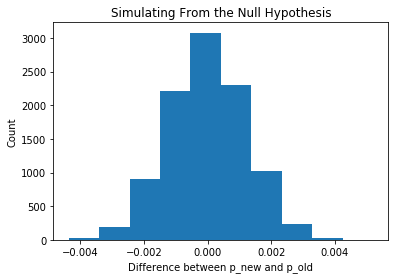

In [32]:
#plotting and setting x,y labels
plt.hist(p_diffs)
plt.title('Simulating From the Null Hypothesis')
plt.xlabel('Difference between p_new and p_old')
plt.ylabel("Count");

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
#showing actual difference in observed CTR
obs_diff = df.query("group == 'treatment'").converted.mean() - df.query("group == 'control'").converted.mean()
obs_diff

-0.0014795997940775518

In [34]:
#displaying proportion of p_diffs greater than obs_diff
(p_diffs > obs_diff).mean()

0.8857

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In the part j , we calculated the value which is scientifically callled p_value . Lesser the  p_value ,the more significant our relationship is with the target . Generally , p_values less than 0.05 are considered to be significant. But here we can see as the 0.8857 is greater than 0.05 ,the relationship is not significant . Here p-value is the probability that our null hypothesis is true , and as the value is approximately 0.889 , it means we fail to reject the null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
#importing statsmodels library
import statsmodels.api as sm


convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [36]:
#calculating and printing the p and z values
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print("Z_score:",z_score)
print("P_value:",p_value)

Z_score: 1.3109241984234394
P_value: 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

** P-values less than 0.05 are called significant but here,as the p-value here is approachng  to 0.9 ,it means the relationship is not significant and we are unable to reject the null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
#setting up the intercept and dummy variables
df['intercept']=1
df['ab_page'] = pd.get_dummies(df['group'])['treatment']

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [38]:
import statsmodels.api as sm
#defining the model
logit = sm.Logit(df['converted'],df[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
#fitting the model
results = logit.fit()
#result summary
results.summary()

Optimization terminated successfully.
         Current function value: 0.366243
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294476
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Aug 2018   Pseudo R-squ.:               7.093e-06
Time:                        13:00:09   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
                                        LLR p-value:                    0.2161
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9887      0.008   -248.297      0.000      -2.004      -1.973
ab_page       -0.0140      0.011     -1.237      0.216      -0.036       0.008
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value associated with ab_page is 0.19.This is different from the p-value in part 2 because of the different approaches in both the methods. In part 2 ,we have the following hypothesis tests :-**

Null Hypothesis (Ho):  $p_{new}$ <= $p_{old}$

Alternative Hypothesis (Ha):  $p_{new}$ > $p_{old}$.

#### And the regression model follows the following hypothesis tests :-

Null Hypothesis (Ho):  $p_{new}$ = $p_{old}$

Alternative Hypothesis (Ha):  $p_{new}$ != $p_{old}$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It is a good idea considering other things as we don't know which parameters are responsible or correlated with the conversion rate. And also we might come up with something we were missing , or a particular case where one page performs better than the other.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
#opening the countries.csv file
countries_df = pd.read_csv('E:/DA_nanodegree/PROJECT4/analyzeabtestresults-2/AnalyzeABTestResults 2/countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [41]:
#checking the data for countries.csv file
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [42]:
#confirming th join
df_new.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [43]:
# Creating dummy variables for country column and joining them
df_new = df_new.join(pd.get_dummies(df_new['country']))

In [44]:
# confirming the change
df_new.head(1)

,country,timestamp,group,landing_page,converted,CA,UK,US
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [45]:
# fitting the model with intercept and countries as response variables
df_new['intercept']=1
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','US','UK']])
results=logit_mod.fit()
#showing the results
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 08 Aug 2018   Pseudo R-squ.:               1.521e-05
Time:                        13:00:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

In [46]:
#creating and joining dummies for the group column
df_new = df_new.join(pd.get_dummies(df_new['group']))

In [47]:
#renaming it as per given conditions
df_new.rename(columns={"treatment":"ab_page"}, inplace=True)
#confirming the change
df_new.head(1)

,country,timestamp,group,landing_page,converted,CA,UK,US,intercept,control,ab_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,1,0


In [48]:
# fitting the model with intercept, ab_page and countries as response variables
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','US','UK','ab_page']])
results=logit_mod.fit()
#showing the results
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 08 Aug 2018   Pseudo R-squ.:               2.323e-05
Time:                        13:00:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

### Interaction between page and country

In [49]:
df_new['CA_ab_page'] = df_new['CA']*df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK']*df_new['ab_page']
df_new['US_ab_page'] = df_new['US']*df_new['ab_page']
df_new.head(1)

,country,timestamp,group,landing_page,converted,CA,UK,US,intercept,control,ab_page,CA_ab_page,UK_ab_page,US_ab_page
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,1,0,0,0,0


In [50]:
# fitting the model with intercept and interaction between page and countries
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','UK_ab_page','US_ab_page']])
results=logit_mod.fit()
#showing the results
results.summary()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 08 Aug 2018   Pseudo R-squ.:               1.082e-05
Time:                        13:32:35   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.3164
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9926      0.008   -252.910      0.000      -2.008      -1.977
UK_ab_page     0.0112      0.018      0.626      0.532      -0.024       0.046
US_ab_page    -0.0144      0.012     -1.155      0.248      -0.039       0.010
==============================================================================
"""

### Here , we can see that the p_values for all the countries ,ab_page are alomst same for all the tested regression models . Also, the p-values for them are :

#### US - 0.130

#### UK - 0.074

#### ab-page - 0.191

### which shows that ,they are not statistically significant .So, we are unable to reject the null hypothesis.

## Interaction between page and countries

### In the model which supports interaction between page and country ,we can see that it returns p-value greater than our previous models. Therefore,we can say that including interactions in our model also do not supports the alternative hypotheses. 

<a id='conclusions'></a>
## Conclusions

- Null hypothesis is accepted.

- The performance of the old page was found better with respect to the new page.

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.